# Подключаем библиотеки

In [1]:
from MainWorkers import FUNCOFMETHODS, pipe, get_gen_sample, times_when_method_better, RunExperiment
import numpy as np
import scipy.stats as sts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime

In [2]:
ResultsForMax, ResultsForSum, Samples, Ultradists = RunExperiment(5000, 5, 100, FUNCOFMETHODS)

In [3]:
# Сохраняем данные в логи
now = str(datetime.datetime.today().replace(microsecond=0))

with open(f"./TestSamples/Samples/{now}", "wb") as fp:
    pickle.dump(Samples, fp)

# with open("./TestSamples/Samples/s1", "rb") as fp:
#     sam = pickle.load(fp)

# Подсчет результатов

In [4]:
ResultsForMax.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,0.689173,0.919894,0.768380,0.749554,0.459947,0.693078
1,0.142240,0.142240,0.078885,0.097373,0.071120,0.087181
2,0.834872,0.834872,0.834872,0.834872,0.834872,0.834872
3,0.666428,0.690922,0.436533,0.350517,0.345461,0.545766
4,1.270739,1.340957,0.659595,0.834572,0.635369,0.683820


In [5]:
ResultsForSum.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,0.412477,0.502370,0.441035,0.433505,0.504167,0.412477
1,0.108274,0.110327,0.089361,0.086731,0.091090,0.085904
2,0.507249,0.603886,0.588587,0.588587,0.588587,0.588587
3,0.301848,0.626476,0.377886,0.412292,0.414315,0.341711
4,0.662588,1.145507,0.458084,0.629615,0.473051,0.428150


# Матрица сравнения результатов

<AxesSubplot: >

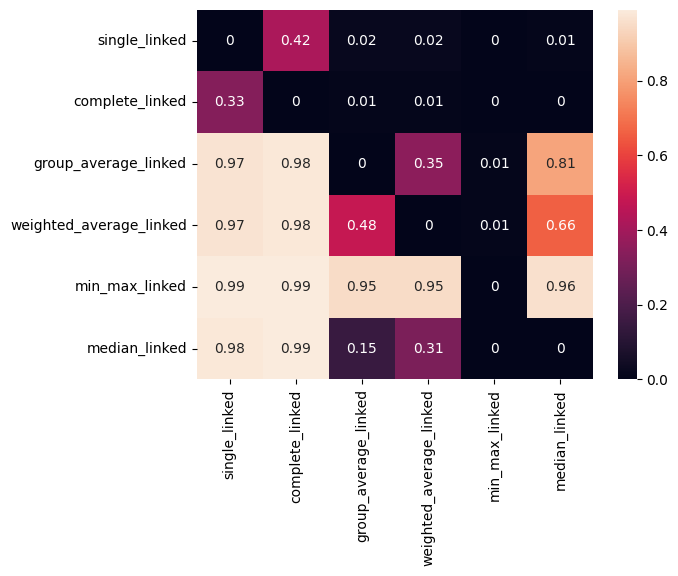

In [6]:
sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

<AxesSubplot: >

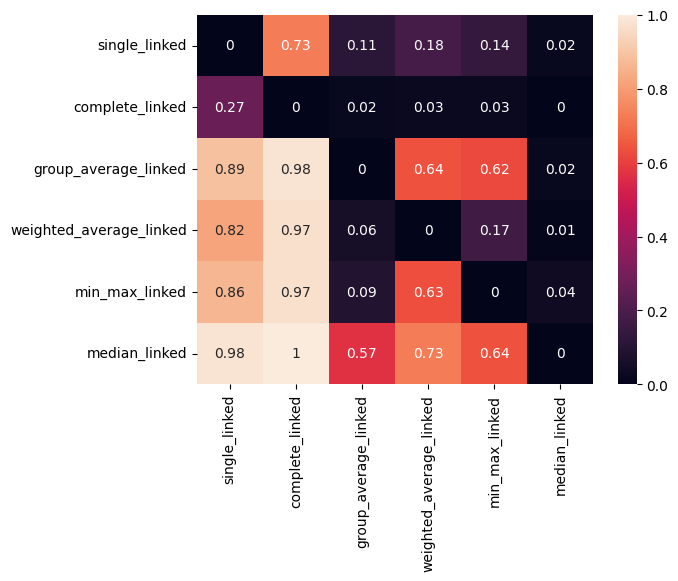

In [7]:
sns.heatmap(times_when_method_better(ResultsForSum), annot=True)

# Проверка на монотонность

In [39]:
for name_of_method in Ultradists.keys():
    print(name_of_method.upper())
    flag = 0
    for num, ultra in enumerate(Ultradists[name_of_method]):
        if sorted(ultra) != ultra:
            print(f"Пример номер {num}")
            print()
            print(ultra)
            print()
            flag = 1
    if flag != 1:
        print("the method is monotonous")
        print()

SINGLE_LINKED
the method is monotonous

COMPLETE_LINKED
the method is monotonous

GROUP_AVERAGE_LINKED
the method is monotonous

WEIGHTED_AVERAGE_LINKED
the method is monotonous

MIN_MAX_LINKED
the method is monotonous

MEDIAN_LINKED
the method is monotonous



# Анализ

In [40]:
# Метрика = Макс, случаи когда МакМин дает результаты хуже, чем weighted_average_linked
list(ResultsForMax[ResultsForMax['min_max_linked'] >= ResultsForMax['single_linked']].index)

[81]

In [41]:
# Метрика = Макс, случаи когда МакМин дает результаты хуже, чем weighted_average_linked
list(ResultsForMax[ResultsForMax['min_max_linked'] >= ResultsForMax['complete_linked']].index)

[2]

In [42]:
# Метрика = Макс, случаи когда МакМин дает результаты хуже, чем weighted_average_linked
list(ResultsForMax[ResultsForMax['min_max_linked'] >= ResultsForMax['weighted_average_linked']].index)

[2, 29, 60, 81, 86]

In [43]:
# Метрика = Макс, случаи когда МакМин дает результаты хуже, чем group_average_linked
list(ResultsForMax[ResultsForMax['min_max_linked'] >= ResultsForMax['group_average_linked']].index)

[2, 29, 60, 66, 81]

In [44]:
# Метрика = Макс, случаи когда МакМин дает результаты хуже, чем median_linked
list(ResultsForMax[ResultsForMax['min_max_linked'] >= ResultsForMax['median_linked']].index)

[2, 29, 66, 81]

In [49]:
# согласно данным выше в индексе 1 какая-то проблема
test_data = np.round_(Samples[2] * 100)
pd.DataFrame(test_data, columns=['x', 'y'])

,x,y
0,102.0,99.0
1,153.0,160.0
2,143.0,133.0
3,184.0,206.0
4,97.0,99.0


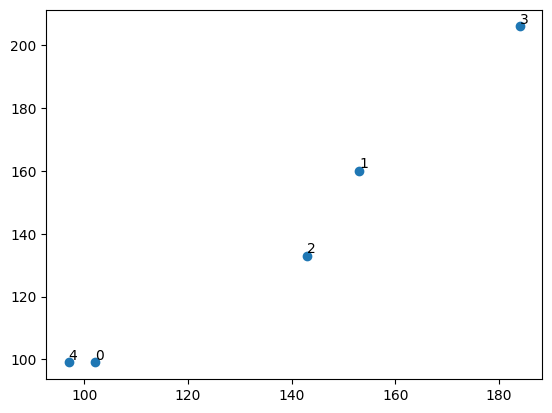

In [50]:
plt.scatter(test_data[:, 0], test_data[:, 1])

for i in range(len(test_data)):
    plt.text(test_data[i][0], test_data[i][1] + 1, str(i))

In [51]:
from MinMaxHierarchy import MinMaxHierarchy

clasters, init_dist, ultra_dists = MinMaxHierarchy(test_data, True)
print(ultra_dists)

Distance matrix: 0 step
            0          1          2           3           4
0    0.000000  79.511006  53.263496  134.807270    5.000000
1   79.511006   0.000000  28.792360   55.470713   82.807005
2   53.263496  28.792360   0.000000   83.725743   57.201399
3  134.807270  55.470713  83.725743    0.000000  137.905765
4    5.000000  82.807005  57.201399  137.905765    0.000000

Clusters:['0' '1' '2' '3' '4']


('Clusters:', array(['(0, 4)', '1', '2', '3'], dtype='<U25'))
Distance matrix: 1 step
            (0, 4)          1          2           3
(0, 4)    0.000000  81.159005  55.232447  136.356517
1        81.159005   0.000000  28.792360   55.470713
2        55.232447  28.792360   0.000000   83.725743
3       136.356517  55.470713  83.725743    0.000000



('Clusters:', array(['(1, 2)', '(0, 4)', '3'], dtype='<U25'))
Distance matrix: 2 step
           (1, 2)      (0, 4)           3
(1, 2)   0.000000   68.035250   69.598228
(0, 4)  68.035250    0.000000  136.356517
3       69.59822

In [52]:
from HierarchyClusteringWithoutLogs import hierarchy
from Linkages import single_linked

hierarchy(test_data, metric='euclidean', method=single_linked)

((((1, 2), (0, 4)), 3),
 array([[  0.        ,  79.51100553,  53.26349594, 134.80726983,
           5.        ],
        [ 79.51100553,   0.        ,  28.7923601 ,  55.47071299,
          82.80700453],
        [ 53.26349594,  28.7923601 ,   0.        ,  83.72574276,
          57.20139858],
        [134.80726983,  55.47071299,  83.72574276,   0.        ,
         137.90576493],
        [  5.        ,  82.80700453,  57.20139858, 137.90576493,
           0.        ]]),
 [5.0, 28.792360097775937, 53.2634959423431, 55.47071299343466])